# Exercise, Nutrition, & Obesity as Predicators of Diabetes at the State Level

## Merging diabetes and npao files

In [2]:
# Dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import scripy.stats as stats

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'hvplot'

In [3]:
#Reading diabetes rates
state_diabetes_data_df = pd.read_csv("Datasets/state_diabetes_data.csv")
state_diabetes_data_df


,State,PopulationCount,Diabetes%
0,Alabama,2895464.0,13.426309
1,Alaska,875478.0,7.560699
2,Arizona,11687735.0,9.181383
3,Arkansas,1471103.0,10.403361
4,California,67100209.0,9.794144
5,Colorado,7530596.0,7.373474
6,Connecticut,2614482.0,10.702947
7,Delaware,212553.0,14.177551
8,District of C,1805136.0,8.870704
9,Florida,15498792.0,11.273714


In [4]:
#Clean diabetes rates dataset
npao_df = pd.read_csv("Datasets/npao_final.csv")
npao_df

,State,Long & Lat,Obesity %,Overweight %,In-Active %,Muscle Strengthening %,Low Aerobics %,High Aerobics %,Strength & Conditioning %,Low Veggies Consumption %,Low Fruit Consumption %
0,Alabama,"(32.84057112200048, -86.63186076199969)",33.419856,34.402665,30.351719,24.379398,43.956773,25.801610,15.482848,25.599805,45.602947
1,Alaska,"(64.84507995700051, -147.72205903599973)",28.337146,37.627901,20.651719,34.140096,57.327324,37.255386,24.586290,18.776312,39.087520
2,Arizona,"(34.865970280000454, -111.76381127699972)",27.033482,36.211155,22.765078,31.002902,53.824667,34.435845,22.613209,20.743749,38.150600
3,Arkansas,"(34.74865012400045, -92.27449074299966)",33.932269,34.859221,32.900491,22.912310,43.908805,27.368902,14.846760,27.518560,48.642681
4,California,"(37.63864012300047, -120.99999953799971)",24.056118,35.882303,19.668067,32.605964,58.273079,36.688512,23.774697,16.757566,31.444280
5,Colorado,"(38.843840757000464, -106.13361092099967)",20.719864,35.756880,16.944605,35.388975,61.501306,39.974180,26.738952,18.194225,35.076421
6,Connecticut,"(41.56266102000046, -72.64984095199964)",25.270320,36.191410,23.022136,30.411319,53.404144,33.175656,21.238581,20.016770,33.222450
7,Delaware,"(39.008830667000495, -75.57774116799965)",29.443461,36.433708,26.480699,31.060428,49.105578,30.155882,20.761835,24.273254,38.813472
8,District of Columbia,"(38.89037138500049, -77.03196112699965)",22.511001,31.285539,19.408868,34.919281,58.186592,35.150930,25.469083,19.371330,33.236759
9,Florida,"(28.932040377000476, -81.92896053899966)",26.199897,36.652335,26.250780,29.274583,51.608785,32.896363,20.310998,20.772560,37.473051


#### Clean nutrition, physical activity, and obesity dataset

In [5]:
state_diabetes_data_df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of C', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolin',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolin', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [6]:
npao_df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [7]:
# filtering out the two places that are not in both sets 
npao_df = npao_df.loc[(npao_df['State'] != 'Guam') & (npao_df['State'] != 'Puerto Rico'), :]
npao_df

,State,Long & Lat,Obesity %,Overweight %,In-Active %,Muscle Strengthening %,Low Aerobics %,High Aerobics %,Strength & Conditioning %,Low Veggies Consumption %,Low Fruit Consumption %
0,Alabama,"(32.84057112200048, -86.63186076199969)",33.419856,34.402665,30.351719,24.379398,43.956773,25.801610,15.482848,25.599805,45.602947
1,Alaska,"(64.84507995700051, -147.72205903599973)",28.337146,37.627901,20.651719,34.140096,57.327324,37.255386,24.586290,18.776312,39.087520
2,Arizona,"(34.865970280000454, -111.76381127699972)",27.033482,36.211155,22.765078,31.002902,53.824667,34.435845,22.613209,20.743749,38.150600
3,Arkansas,"(34.74865012400045, -92.27449074299966)",33.932269,34.859221,32.900491,22.912310,43.908805,27.368902,14.846760,27.518560,48.642681
4,California,"(37.63864012300047, -120.99999953799971)",24.056118,35.882303,19.668067,32.605964,58.273079,36.688512,23.774697,16.757566,31.444280
5,Colorado,"(38.843840757000464, -106.13361092099967)",20.719864,35.756880,16.944605,35.388975,61.501306,39.974180,26.738952,18.194225,35.076421
6,Connecticut,"(41.56266102000046, -72.64984095199964)",25.270320,36.191410,23.022136,30.411319,53.404144,33.175656,21.238581,20.016770,33.222450
7,Delaware,"(39.008830667000495, -75.57774116799965)",29.443461,36.433708,26.480699,31.060428,49.105578,30.155882,20.761835,24.273254,38.813472
8,District of Columbia,"(38.89037138500049, -77.03196112699965)",22.511001,31.285539,19.408868,34.919281,58.186592,35.150930,25.469083,19.371330,33.236759
9,Florida,"(28.932040377000476, -81.92896053899966)",26.199897,36.652335,26.250780,29.274583,51.608785,32.896363,20.310998,20.772560,37.473051


In [8]:
# Matching the state names on the diabetes dataset to the npao one
state_diabetes_data_df["State"] = state_diabetes_data_df["State"]. replace(
    {'District of C': 'District of Columbia', 'North Carolin': 'North Carolina',
     'South Carolin': 'South Carolina'})
state_diabetes_data_df


,State,PopulationCount,Diabetes%
0,Alabama,2895464.0,13.426309
1,Alaska,875478.0,7.560699
2,Arizona,11687735.0,9.181383
3,Arkansas,1471103.0,10.403361
4,California,67100209.0,9.794144
5,Colorado,7530596.0,7.373474
6,Connecticut,2614482.0,10.702947
7,Delaware,212553.0,14.177551
8,District of Columbia,1805136.0,8.870704
9,Florida,15498792.0,11.273714


In [9]:
# Merge the two cleaned datasets
merged_df = pd.merge(state_diabetes_data_df, npao_df,  how = "inner", on ="State")
merged_df.head()

,State,PopulationCount,Diabetes%,Long & Lat,Obesity %,Overweight %,In-Active %,Muscle Strengthening %,Low Aerobics %,High Aerobics %,Strength & Conditioning %,Low Veggies Consumption %,Low Fruit Consumption %
0,Alabama,2895464.0,13.426309,"(32.84057112200048, -86.63186076199969)",33.419856,34.402665,30.351719,24.379398,43.956773,25.801610,15.482848,25.599805,45.602947
1,Alaska,875478.0,7.560699,"(64.84507995700051, -147.72205903599973)",28.337146,37.627901,20.651719,34.140096,57.327324,37.255386,24.586290,18.776312,39.087520
2,Arizona,11687735.0,9.181383,"(34.865970280000454, -111.76381127699972)",27.033482,36.211155,22.765078,31.002902,53.824667,34.435845,22.613209,20.743749,38.150600
3,Arkansas,1471103.0,10.403361,"(34.74865012400045, -92.27449074299966)",33.932269,34.859221,32.900491,22.912310,43.908805,27.368902,14.846760,27.518560,48.642681
4,California,67100209.0,9.794144,"(37.63864012300047, -120.99999953799971)",24.056118,35.882303,19.668067,32.605964,58.273079,36.688512,23.774697,16.757566,31.444280


In [10]:
merged_df.to_csv("Datasets\diabetes_merged_file.csv", encoding="utf-8", index=False, header=True)

## Describe the rate of diabetes in the US

NameError: name 'plt' is not defined

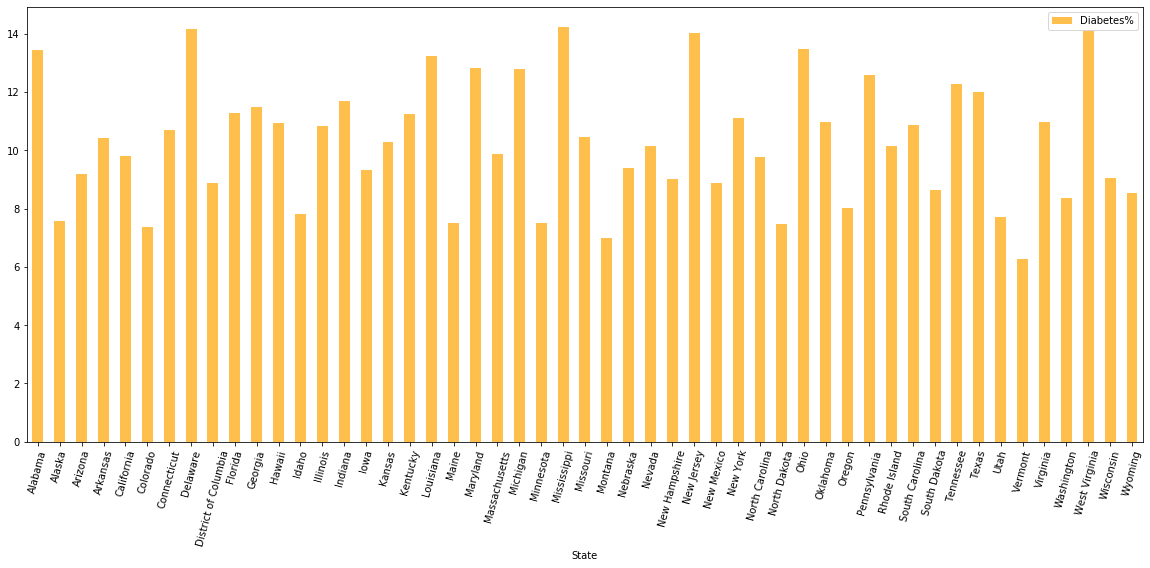

In [11]:
# Plot the bar chart
merged_df.plot(kind='bar', x='State', y='Diabetes%', color='orange', alpha =0.7, figsize = (20,8), rot = 75)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Diabetes%')
plt.title('Diabetes rate % across U.S States')

# Show plot
plt.show()
plt.tight_layout()

In [ ]:
# creating new columns for long and lat 

# spliting the column
merged_df[['lat', 'long']] = merged_df['Long & Lat'].str.split(',', expand=True)

# replacing prentheses with nothing and change to float
merged_df['lat'] = merged_df['lat'].str.replace('(', '').astype(float)
merged_df['long'] = merged_df['long'].str.replace(')', '').astype(float)
merged_df.info()

In [ ]:
# Plotting the diabetes rate on map
diabetes_plot = merged_df.hvplot.points(
    "long",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 1000,
    frame_height = 600,
    size = "Diabetes%",
    scale= 5,
    color = "Diabetes%"
      )
# Display the map plot
diabetes_plot

NameError: name 'plt' is not defined

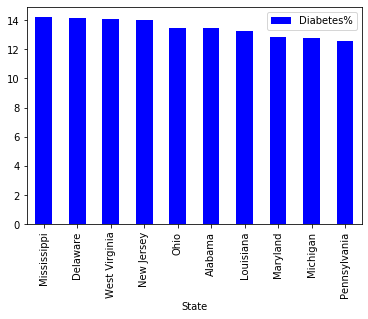

In [12]:
# Top 10 Diabetes%

# Sort the data by values in descending order
top_df = merged_df.sort_values('Diabetes%', ascending=False).head(10)

# Plot the bar chart
top_df.plot(kind='bar', x='State', y='Diabetes%', color='blue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Diabetes%')
plt.title('Top 10 States Diabetes rate (%)')

# Show plot
plt.show()

NameError: name 'plt' is not defined

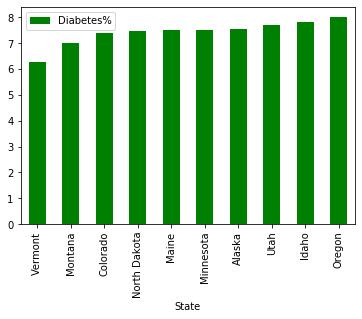

In [13]:
# Bottom 10 Diabetes%
# Sort the data by values in descending order
bottom_df = merged_df.sort_values('Diabetes%').head(10)

# Plot the bar chart
bottom_df.plot(kind='bar', x='State', y='Diabetes%', color='green')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Diabetes%')
plt.title('Bottom 10 States Diabetes rate (%)')

# Show plot
plt.show()

Summary of findings:
* lkljkljlkj
* kjhhjkhk

## Compare rates among US regions


In [28]:
#Idenifying rates in each region
states_to_region_dict = {'Montana': 'West', 'Idaho': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
           'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West', 'California': 'West', 'Oregon': 'West',
           'Washington': 'West', 'Alaska': 'West', 'Hawaii': 'West', 
                         'Illinois': 'Mid_West', 'Indiana': 'Mid_West', 'Iowa': 'Mid_West', 'Kansas': 'Mid_West', 'Michigan': 'Mid_West',
           'Minnesota': 'Mid_West', 'Missouri': 'Mid_West', 'Nebraska': 'Mid_West', 'North Dakota': 'Mid_West', 'Ohio': 'Mid_West',
           'South Dakota': 'Mid_West', 'Wisconsin': 'Mid_West',
                         'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South',
           'South Carolina': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Louisiana':'South', 'Oklahoma':'South', 'Texas':'South',
           'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South',
                         'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast',
           'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast'
}
merged_df['Region'] = merged_df['State'].map(states_to_region_dict)
print(merged_df)       

# save the DataFrame to a CSV file
merged_df.to_csv('states_regions.csv', index=False)


                   State  PopulationCount  Diabetes%  \
0                Alabama        2895464.0  13.426309   
1                 Alaska         875478.0   7.560699   
2                Arizona       11687735.0   9.181383   
3               Arkansas        1471103.0  10.403361   
4             California       67100209.0   9.794144   
5               Colorado        7530596.0   7.373474   
6            Connecticut        2614482.0  10.702947   
7               Delaware         212553.0  14.177551   
8   District of Columbia        1805136.0   8.870704   
9                Florida       15498792.0  11.273714   
10               Georgia        4655188.0  11.485595   
11                Hawaii        2859575.0  10.930849   
12                 Idaho        1086951.0   7.824498   
13              Illinois       13342475.0  10.846942   
14               Indiana        5482268.0  11.691079   
15                  Iowa        1945093.0   9.305029   
16                Kansas        3127363.0  10.29

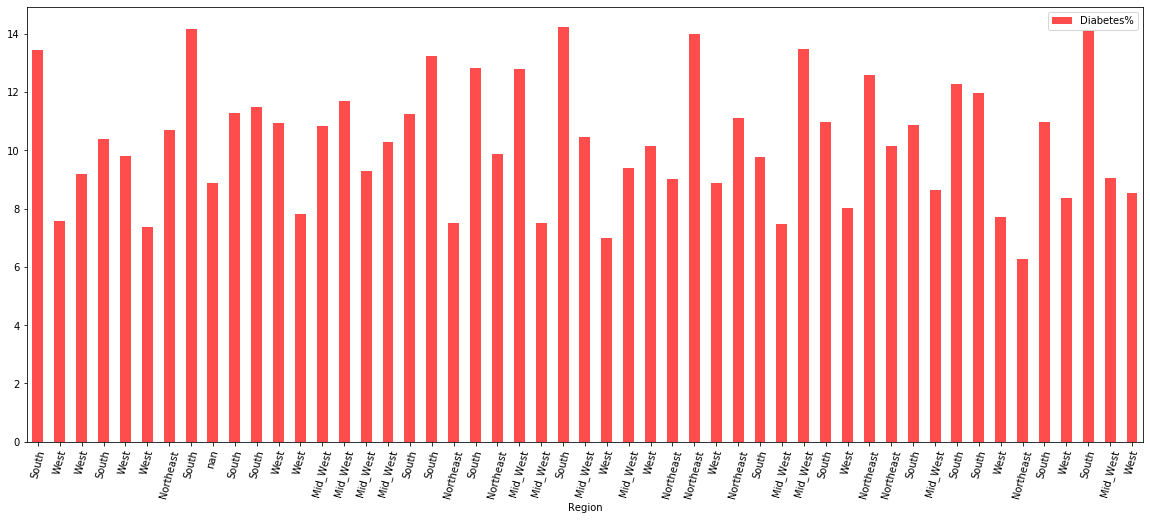

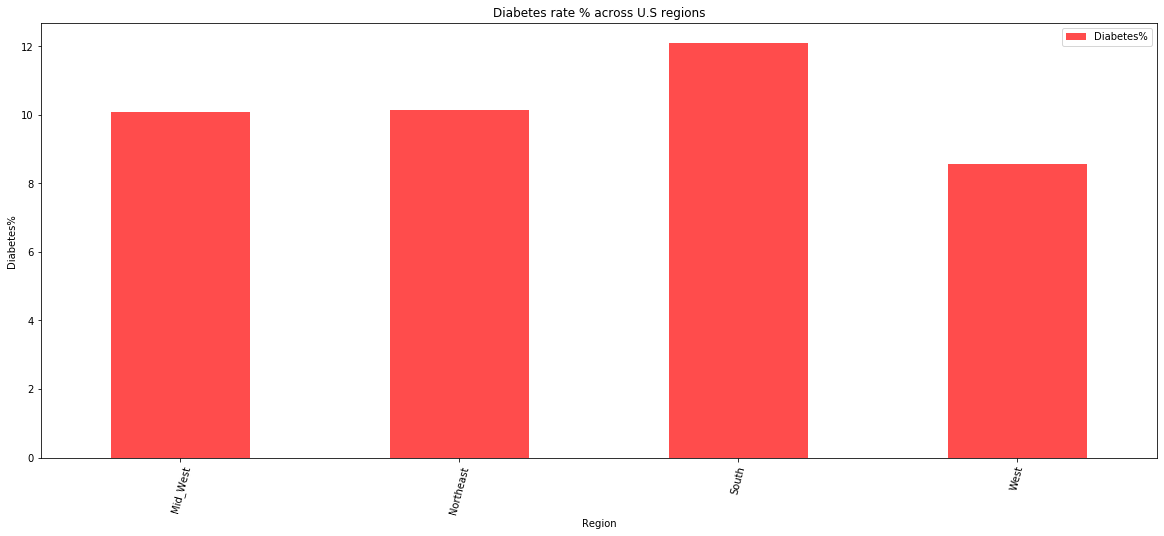

<Figure size 432x288 with 0 Axes>

In [32]:
#Extract data from csv file
df = pd.read_csv('states_regions.csv')

# Plot the bar chart
merged_df.plot(kind='bar', x='Region', y='Diabetes%', color='Red', alpha =0.7, figsize = (20,8), rot = 75)


# Group the data by region
grouped_df = df.groupby(['Region'])['Diabetes%'].mean().reset_index()

# Plot the bar chart
grouped_df.plot(kind='bar', x='Region', y='Diabetes%', color='Red', alpha =0.7, figsize = (20,8), rot = 75)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Diabetes%')
plt.title('Diabetes rate % across U.S regions')

# Show plot
plt.show()
plt.tight_layout()


## Inspect relationship between nutrition, physical activity, obesity, and diabetes



In [19]:
# dependencies
import matplotlib.pyplot as plt
import scipy.stats as st

In [20]:
# Creating arrays of all variables
diabetes = merged_df['Diabetes%']
obesity = merged_df['Obesity %']
overweight = merged_df['Overweight %']
inactive = merged_df['In-Active %']
strength = merged_df['Muscle Strengthening %']
low_aerobics = merged_df['Low Aerobics %']
high_aerobics = merged_df['High Aerobics %']
stren_cond = merged_df['Strength & Conditioning %']
low_veggies = merged_df['Low Veggies Consumption %']
low_fruit = merged_df['Low Fruit Consumption %']

In [ ]:
# Relationship between Obesity and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(obesity,diabetes)
plt.scatter(obesity,diabetes)
plt.xlabel('Obesity Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Obesity** is {round(correlation[0],2)}")
plt.show()

Higher obesity rates in states in 2011-2015 is related to higher diabetes rates in 2016-2017

In [ ]:
# Relationship between Overweight and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(overweight,diabetes)
plt.scatter(overweight,diabetes)
plt.xlabel('Overweight Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Overweight** is {round(correlation[0],2)}")
plt.show()

There is one state that is an outlier, and because of that the ccorrelation looks negative.
Taking out this outlier will result in no relationship between overweight and diabetes.

In [ ]:
# Relationship between Inactivity and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(inactive,diabetes)
plt.scatter(inactive,diabetes)
plt.xlabel('Inactivity: rates of sedentary people (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Inactivity** is {round(correlation[0],2)}")
plt.show()

Inactivity is strongly related to diabetes. Higher rates of inactivity in the states are related to higher rates of obesity.

In [ ]:
# Relationship between Muscle Strengthening and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(strength,diabetes)
plt.scatter(strength,diabetes)
plt.xlabel('Rates of People who Do Muscle Strengthening Activiites (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Muscle Strenghtening** is {round(correlation[0],2)}")
plt.show()

Higher muscle strengtheining rates are moderately related to lower diabetes rates

In [ ]:
# Relationship between Low Aerobic Exercise and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(low_aerobics,diabetes)
plt.scatter(low_aerobics,diabetes)
plt.xlabel('Low Aerobic Exercise Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Low Aerobic Exercise** is {round(correlation[0],2)}")
plt.show()

Higher low aerobic exercise rates are moderately related to lower diabetes rates

In [ ]:
# Relationship between High Aerobic Exercise and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(high_aerobics,diabetes)
plt.scatter(high_aerobics,diabetes)
plt.xlabel('High Aerobic Exercise Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **High Aerobic Exercise** is {round(correlation[0],2)}")
plt.show()

Higher high aerobic exercise rates are moderately related to lower diabetes rates

In [ ]:
# Relationship between Strength and Conditioning and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(stren_cond,diabetes)
plt.scatter(stren_cond,diabetes)
plt.xlabel('Strength and Conditioning Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Strength and Conditioning** is {round(correlation[0],2)}")
plt.show()

Higher strength and conditioning exercise rates are moderately related to lower diabetes rates

In [ ]:
# Relationship between low consumption of vegetables and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(low_veggies,diabetes)
plt.scatter(low_veggies,diabetes)
plt.xlabel('Rates of Low Consumption of Vegetables (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Low Consumption of Vegetables** is {round(correlation[0],2)}")
plt.show() 

Higher rates of people not eating veggies are moderately related to higher diabetes rates

In [ ]:
# Relationship between low consumption of fruit and Diabetes (pearson corr and scatter plot)
correlation = st.pearsonr(low_fruit,diabetes)
plt.scatter(low_fruit,diabetes)
plt.xlabel('Rates of Low Consumption of Fruit (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The correlation between **Diabetes** and **Low Consumption of Fruit** is {round(correlation[0],2)}")
plt.show()

Higher rates of people not eating fruit are moderately related to higher diabetes rates

Summary of findings:
* Higher obesity rates in states in 2011-2015 are moderately related to higher diabetes rates in 2016-2017
* Higher inactivity rates in states in 2011-2015 are strongly related to higher diabetes rates in 2016-2017
* Higher muscle strengtheining rates in states in 2011-2015 are moderately related to lower diabetes rates in 2016-2017
* Higher low aeroobics exercise rates in states in 2011-2015 are moderately related to lower diabetes rates in 2016-2017
* Higher high aeroobics exercise rates in states in 2011-2015 are moderately related to lower diabetes rates in 2016-2017
* Higher strength and conditioning exercise rates in states in 2011-2015 are moderately related to lower diabetes rates in 2016-2017
* Higher strength and conditioning exercise rates in states in 2011-2015 are moderately related to lower diabetes rates in 2016-2017
* Higher rates of people not eating vegetables in states in 2011-2015 are moderately related higher diabetes rates in 2016-2017
* Higher rates of people not eating fruit in states in 2011-2015 are moderately related higher diabetes rates in 2016-2017

## Predict diabetes rates based on nutrition, physical activity, obesity, and diabetes

In [ ]:
# Showing all bi variate correlations between the variables that have highest correlation with diabetes
corr_matrix = merged_df[['Diabetes%', 'Obesity %', 'In-Active %', 'Low Veggies Consumption %']].corr()
print('Correlation Matrix \n', corr_matrix)


Nutrition, physical activitiy, and obesity are highly correlated

In [ ]:
#fitting a multiple linear regression: Diabete and Obesity

# dependnecies
from scipy.stats import linregress

# Spliting the data into predictor (x) and target (y)
x = merged_df['Obesity %']
y = merged_df["Diabetes%"]

# linear regression values, scatter plot and plotting the regression line on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regr_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regr_values,"r-")
plt.annotate(line_eq,(28.3,6.3),fontsize=15,color="green")
plt.xlabel('Obesity Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Obesity rates in the states explain 27% of the variability in diabetes rates

In [ ]:
#fitting a multiple linear regression: Diabete and Inactivity
x = merged_df['In-Active %']

# linear regression values, scatter plot and plotting the regression line on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regr_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regr_values,"r-")
plt.annotate(line_eq,(26.3,6.3),fontsize=15,color="orange")
plt.xlabel('Inactivity Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Inactivity rates in the states explain 51% of the variability in diabetes rates

In [ ]:
#fitting a multiple linear regression: Diabete and Low Vegetable Consumption
x = merged_df['Low Veggies Consumption %']

# linear regression values, scatter plot and plotting the regression line on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regr_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regr_values,"r-")
plt.annotate(line_eq,(23.3,6.3),fontsize=15,color="cyan")
plt.xlabel('Low Vegetable Consumption Rates (%)')
plt.ylabel('Diabetes Rates (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Low vegetable consumption rates in the states explain 31% of the variability in diabetes rates

Summary of findings:
* Nutrition, physical activitiy, and obesity are highly correlated
* Obesity rates in the states explain 27% of the variability in diabetes rates
* Inactivity rates in the states explain 51% of the variability in diabetes rates
* Low vegetable consumption rates in the states explain 31% of the variability in diabetes rates